In [1]:
import wave
import struct
import sys
import csv
import numpy 
from scipy.io import wavfile
from scipy.signal import resample

In [3]:
fname = './audio.csv'
outfile = 'output.wav'

data = []

with open(fname, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter = ',')

    for row in spamreader:
        data.append(row[0])

# npdata = numpy.array(data)
print(data)

["b''", "b'8'", "b'16'", "b'19'", "b'11'", "b'3'", "b'0'", "b'1'", "b'0'", "b'-1'", "b'0'", "b'8'", "b'18'", "b'14'", "b'12'", "b'3'", "b'0'", "b'-16'", "b'-21'", "b'-21'", "b'-18'", "b'-6'", "b'-4'", "b'1'", "b'5'", "b'5'", "b'-8'", "b'-27'", "b'-33'", "b'-30'", "b'-10'", "b'-14'", "b'-14'", "b'-10'", "b'-6'", "b'2'", "b'4'", "b'8'", "b'14'", "b'10'", "b'3'", "b'-4'", "b'-4'", "b'1'", "b'-1'", "b'-6'", "b'-5'", "b'-6'", "b'-7'", "b'-9'", "b'-5'", "b'4'", "b'5'", "b'6'", "b'5'", "b'7'", "b'-33'", "b'-33'", "b'-26'", "b'-18'", "b'-18'", "b'-23'", "b'-27'", "b'-32'", "b'-35'", "b'-36'", "b'-37'", "b'-19'", "b'-22'", "b'-23'", "b'-24'", "b'-27'", "b'-27'", "b'-27'", "b'-25'", "b'-26'", "b'-28'", "b'-37'", "b'-25'", "b'-26'", "b'-20'", "b'-19'", "b'-16'", "b'-18'", "b'-18'", "b'-21'", "b'-21'", "b'-25'", "b'-24'", "b'21'", "b'15'", "b'8'", "b'6'", "b'14'", "b'11'", "b'18'", "b'18'", "b'20'", "b'16'", "b'14'", "b'12'", "b'11'", "b'16'", "b'15'", "b'16'", "b'24'", "b'26'", "b'25'", "b'19'", 

In [15]:
# strip byte format
dum = [x[2:-1] for x in data[1:]]
print(dum)

['8', '16', '19', '11', '3', '0', '1', '0', '-1', '0', '8', '18', '14', '12', '3', '0', '-16', '-21', '-21', '-18', '-6', '-4', '1', '5', '5', '-8', '-27', '-33', '-30', '-10', '-14', '-14', '-10', '-6', '2', '4', '8', '14', '10', '3', '-4', '-4', '1', '-1', '-6', '-5', '-6', '-7', '-9', '-5', '4', '5', '6', '5', '7', '-33', '-33', '-26', '-18', '-18', '-23', '-27', '-32', '-35', '-36', '-37', '-19', '-22', '-23', '-24', '-27', '-27', '-27', '-25', '-26', '-28', '-37', '-25', '-26', '-20', '-19', '-16', '-18', '-18', '-21', '-21', '-25', '-24', '21', '15', '8', '6', '14', '11', '18', '18', '20', '16', '14', '12', '11', '16', '15', '16', '24', '26', '25', '19', '20', '23', '26', '26', '26', '29', '28', '27', '27', '28', '26', '25', '22', '28', '26', '28', '28', '28', '25', '25', '23', '20', '21', '15', '11', '12', '13', '16', '18', '41', '40', '49', '45', '47', '49', '52', '47', '47', '42', '41', '46', '41', '46', '45', '45', '46', '18', '23', '21', '16', '16', '15', '17', '12', '15', '

In [26]:
# 16khz sampling rate
#data is in int16
npdata = numpy.array(dum)
npdata = npdata.astype(numpy.int16)
print(type(npdata[0]))

<class 'numpy.int16'>


In [28]:
wavfile.write(outfile, 16000, npdata)

In [31]:
print("max: {}".format(max(npdata) ))
print("min: {}".format(min(npdata) ))
print("len: {}".format(len(npdata) ))

max: 62
min: -67
len: 15999


ValueError: too many values to unpack (expected 2)

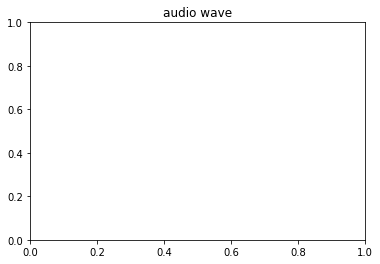

In [30]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.title("audio wave")
y,x = enumerate(data[1:10])
plt.plot(x,y)
plt.show()

In [8]:
udata = npdata.astype(numpy.uint16)

In [10]:
udata

array([ 1266,   541, 12620, ...,  1086, 13456,   403], dtype=uint16)

In [9]:
newdata = udata.astype(numpy.int16)

In [69]:
newdata

array([ 1171,   256, 13288, ..., 13300,   426,  1157], dtype=int16)

In [11]:
def twos_comp(val, bits):
    """compute the 2's complement of int value val"""
    if (val & (1 << (bits - 1))) != 0: # if sign bit is set e.g., 8bit: 128-255
        val = val - (1 << bits)        # compute negative value
    return val

In [18]:
twos_arr = []
for i in data:
    twos_arr.append(twos_comp((i,2),16))


TypeError: unsupported operand type(s) for &: 'tuple' and 'int'

In [ ]:
for i in twos_arr:
    print(i)